# dyyoon

# 0.개발환경

Windows 10, Python 3.6.9, Scikit-learn 0.23.2 <br>
pandas 1.1.5, numpy 1.18.5, scipy 1.4.1

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.6.9.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.8.0-43-generic
Version          : #49~20.04.1-Ubuntu SMP Fri Feb 5 09:57:56 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : C.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.18.5
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 47.3.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.16.1
pandas_datareader: None
bs4              : None
bottleneck       : None
fsspec      

# 1. 데이터로드

In [1]:
import pandas as pd
pd.options.display.float_format='{:.5f}'.format # 5자리까지출력

import warnings
warnings.filterwarnings(action='ignore') # 에러는 무시

train = pd.read_csv('data/train.csv')
valid = pd.read_csv('data/validation.csv')
test = pd.read_csv('data/test.csv')

In [2]:
train.info() #간단한 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536535 entries, 0 to 2536534
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   click_timestamp        int64  
 1   integer_feature_1      float64
 2   integer_feature_2      float64
 3   integer_feature_3      int64  
 4   integer_feature_4      float64
 5   integer_feature_5      int64  
 6   integer_feature_6      float64
 7   integer_feature_7      float64
 8   integer_feature_8      float64
 9   categorical_feature_1  object 
 10  categorical_feature_2  object 
 11  categorical_feature_3  object 
 12  categorical_feature_4  object 
 13  categorical_feature_5  object 
 14  categorical_feature_6  object 
 15  categorical_feature_7  object 
 16  categorical_feature_8  object 
 17  categorical_feature_9  object 
 18  label                  int64  
dtypes: float64(6), int64(4), object(9)
memory usage: 367.7+ MB


# 2. EDA 및 데이터 기초통계 분석
- 기초통계 확인 및 종속변수 분포확인
- 정수형변수들간의 상관성 
- 범주형변수들간의 상관성 
- 결측치 처리
- 클릭발생시간의 분포
- 이상치확인
- 구매, 비구매를 잘 구분하는 중요한 변수는? --> 변수중요도 확인

In [79]:
train.describe()

,click_timestamp,integer_feature_1,integer_feature_2,integer_feature_3,integer_feature_4,integer_feature_5,integer_feature_6,integer_feature_7,integer_feature_8,categorical_feature_1,categorical_feature_2,categorical_feature_3,categorical_feature_4,categorical_feature_5,categorical_feature_6,categorical_feature_7,categorical_feature_8,categorical_feature_9,label
count,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000,2029228.00000
mean,437123.97405,0.00084,0.00518,0.02393,0.00050,0.02612,0.00106,0.00340,0.00257,19081.21146,2111.89373,5335.59418,4087.15562,1484.91034,1240.75603,4785.96810,6.49068,1025.67435,0.22162
std,243013.13551,0.00535,0.01894,0.09126,0.00353,0.09705,0.00319,0.01357,0.00804,10684.31681,1188.88186,3105.59760,2427.84460,812.54401,3430.53942,2959.31018,3.20324,2184.95484,0.41533
min,7.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,227965.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00003,0.00014,9892.00000,1097.00000,2811.00000,1933.00000,788.00000,0.00000,2143.00000,4.00000,0.00000,0.00000
50%,454883.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00067,0.00070,18848.00000,2184.00000,5321.00000,4158.00000,1439.00000,0.00000,4519.00000,9.00000,0.00000,0.00000
75%,645266.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00097,0.00273,0.00224,28303.00000,3126.00000,7997.00000,6166.00000,2220.00000,0.00000,7433.00000,9.00000,0.00000,0.00000
max,863999.00000,1.00000,1.00000,0.99836,1.00000,0.99507,0.99742,1.00000,1.00000,37773.00000,4140.00000,10877.00000,8070.00000,2852.00000,16489.00000,9822.00000,9.00000,8710.00000,1.00000


In [ ]:
valid.describe()

정수형변수들의 범위가 다 다름을 확인 스케일링이 필요할 듯 함.<br>
정수형변수 3, 정수형변수 5는 비슷한 분포를 가지는 것으로 생각됨(평균과 표준편차 그리고 최대 최소가 비슷함)

## 종속변수 분포 확인 

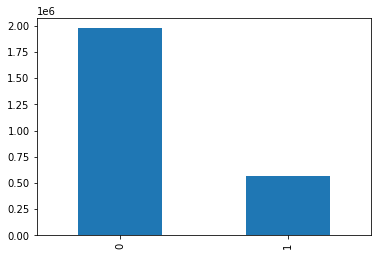

In [4]:
# 종속변수 체크
train['label'].value_counts().plot(kind='bar')

In [5]:
train['label'].value_counts()

0    1974288
1     562247
Name: label, dtype: int64

상대적으로 0이 많음 

## 정수형변수들간의 상관성
- train , valid 확인

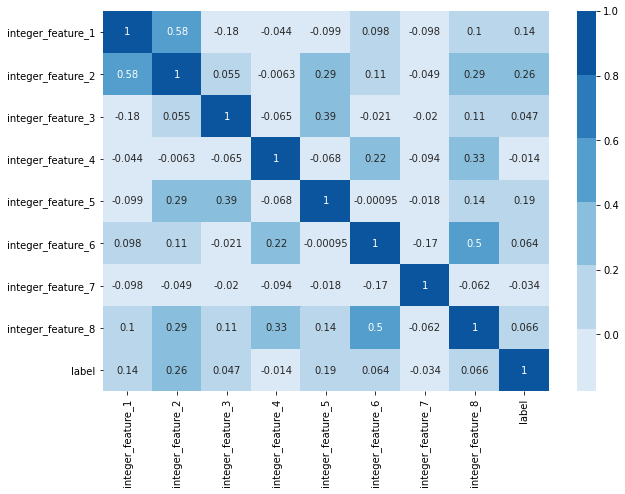

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = train.iloc[:,1:].corr()
cmap = sns.color_palette('Blues')
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(corr, cmap= cmap,annot = True)

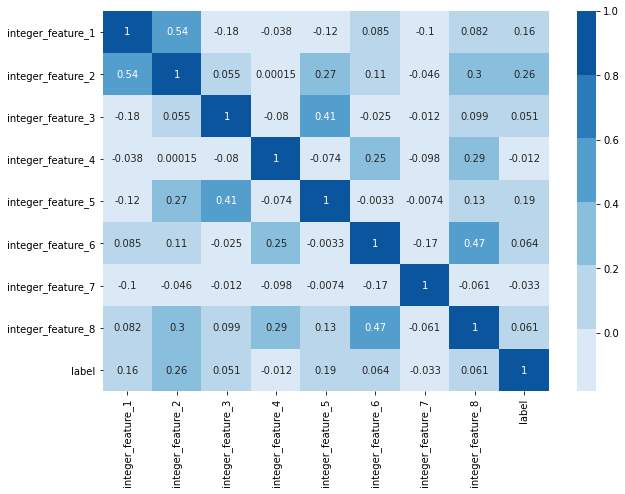

In [10]:
corr = valid.iloc[:,1:].corr()
cmap = sns.color_palette('Blues')
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(corr, cmap= cmap,annot = True)

정수형변수 1, 정수형변수 2간의 상관성이 0.58로 양의 상관성이있음을 확인

## 범주형 변수들의 상관성
- train, valid 확인

In [11]:
# ho: label과 범주형변수1과 관계가 없다.
# h1: label과 범주형변수1과 관계가 있다.
import scipy.stats as stats

cate = [col for c, col in enumerate(train.columns) if 'cat' in col]
for k in cate:
    # 두 질적자료의 빈도표를 생성
    train_corr = pd.crosstab(train.label, train[k])
    chiresult = stats.chi2_contingency(observed = train_corr )
    if chiresult[1] < 0.05:
        print(k, '귀무가설기각, 관련성이 있다')
    else:
        print(k, '귀무가설채택, 관련성이 없다')

categorical_feature_1 귀무가설기각, 관련성이 있다
categorical_feature_2 귀무가설기각, 관련성이 있다
categorical_feature_3 귀무가설기각, 관련성이 있다
categorical_feature_4 귀무가설기각, 관련성이 있다
categorical_feature_5 귀무가설기각, 관련성이 있다
categorical_feature_6 귀무가설기각, 관련성이 있다
categorical_feature_7 귀무가설기각, 관련성이 있다
categorical_feature_8 귀무가설기각, 관련성이 있다
categorical_feature_9 귀무가설기각, 관련성이 있다


In [12]:
cate = [col for c, col in enumerate(valid.columns) if 'cat' in col]
for k in cate:
    # 두 질적자료의 빈도표를 생성
    valid_corr = pd.crosstab(valid.label, valid[k])
    chiresult = stats.chi2_contingency(observed = valid_corr )
    if chiresult[1] < 0.05:
        print(k, '귀무가설기각, 관련성이 있다')
    else:
        print(k, '귀무가설채택, 관련성이 없다')

categorical_feature_1 귀무가설기각, 관련성이 있다
categorical_feature_2 귀무가설기각, 관련성이 있다
categorical_feature_3 귀무가설기각, 관련성이 있다
categorical_feature_4 귀무가설기각, 관련성이 있다
categorical_feature_5 귀무가설기각, 관련성이 있다
categorical_feature_6 귀무가설기각, 관련성이 있다
categorical_feature_7 귀무가설기각, 관련성이 있다
categorical_feature_8 귀무가설기각, 관련성이 있다
categorical_feature_9 귀무가설기각, 관련성이 있다


범주형변수(독립변수)는 label(종속변수)와 모두 관련성이 있음을 확인 

## 결측치

In [13]:
train.isnull().sum() # 결측치

missdf  = train.isnull().sum().reset_index()  # 결측치 비율
missdf.columns = ['column','count']  
missdf['ratio'] = missdf['count']/train.shape[0]
missdf

,column,count,ratio
0,click_timestamp,0,0.00000
1,integer_feature_1,1911358,0.75353
2,integer_feature_2,30869,0.01217
3,integer_feature_3,0,0.00000
4,integer_feature_4,1911358,0.75353
5,integer_feature_5,0,0.00000
6,integer_feature_6,830322,0.32734
7,integer_feature_7,18263,0.00720
8,integer_feature_8,30869,0.01217
9,categorical_feature_1,0,0.00000


In [14]:
valid.isnull().sum() # 결측치

missdf_valid  = valid.isnull().sum().reset_index() # 결측치 비율
missdf_valid.columns = ['column','count']
missdf_valid['ratio'] = missdf_valid['count']/valid.shape[0]
missdf_valid

,column,count,ratio
0,click_timestamp,0,0.00000
1,integer_feature_1,369040,0.74734
2,integer_feature_2,4884,0.00989
3,integer_feature_3,0,0.00000
4,integer_feature_4,369040,0.74734
5,integer_feature_5,0,0.00000
6,integer_feature_6,175826,0.35607
7,integer_feature_7,4541,0.00920
8,integer_feature_8,4884,0.00989
9,categorical_feature_1,0,0.00000


In [15]:
test.isnull().sum() # 결측치

missdf_test  = test.isnull().sum().reset_index() # 결측치 비율
missdf_test.columns = ['column','count']
missdf_test['ratio'] = missdf_test['count']/test.shape[0]
missdf_test

,column,count,ratio
0,id,0,0.00000
1,click_timestamp,0,0.00000
2,integer_feature_1,368519,0.73918
3,integer_feature_2,4639,0.00930
4,integer_feature_3,0,0.00000
5,integer_feature_4,368519,0.73918
6,integer_feature_5,0,0.00000
7,integer_feature_6,161264,0.32346
8,integer_feature_7,4902,0.00983
9,integer_feature_8,4639,0.00930


In [181]:
# 결측치 있는 비율
train[['integer_feature_1','integer_feature_4','categorical_feature_9','label']].groupby(['integer_feature_1','integer_feature_4','categorical_feature_9']).count()

label
integer_feature_1 integer_feature_4 categorical_feature_9       
0.00000           0.00000           00119446                1927
                                    0015d208                   1
                                    001ae36f                   1
                                    0024aa8e                   1
                                    00347e38                   6
...                                                          ...
300.00000         0.00000           1d790ecf                   1
305.00000         0.00000           1d790ecf                   1
387.00000         0.00000           feba1314                   1
472.00000         0.00000           938fb92f                   1
496.00000         0.00000           938fb92f                   1

[46178 rows x 1 columns]

## 결측치 시각화

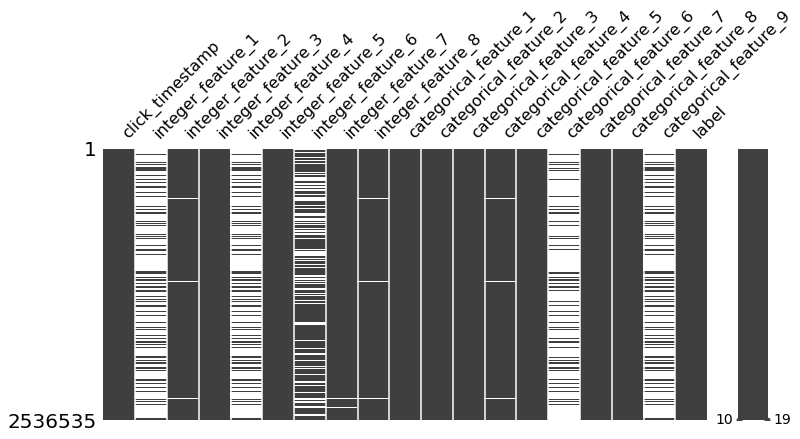

In [45]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

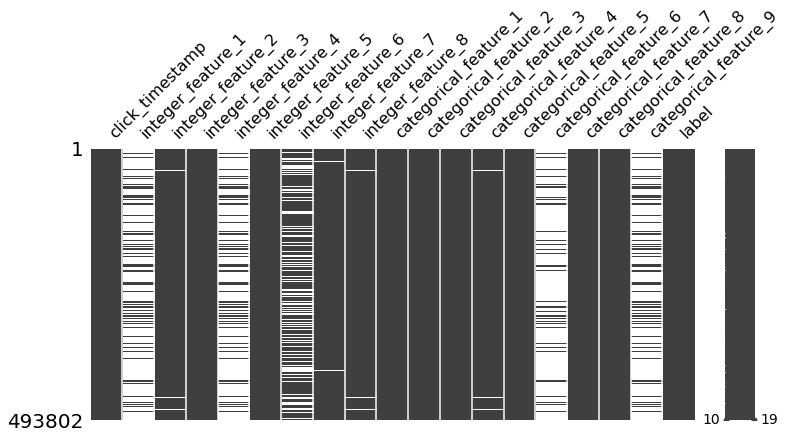

In [18]:
msno.matrix(valid, figsize=(12,5))

정수형변수 1, 4 그리고 범주형변수 6, 9가 결측치 70%이상으로 나타났으며 <br>
정수형변수 1, 4 범주형변수 9 는 비슷한 비율이며 같은 행에 결측치가 있음을 확인함. <br>
train, valid의 결측치가 비슷한 분포로 되어있음 이런것도 특징이 될 수 있지않을까? 생각해봄

## 클릭발생시간의 분포

In [19]:
### 클릭발생시간의 분포
import matplotlib.pyplot as plt
train['click_timestamp'].value_counts()

498971    18
392211    18
376621    17
504398    17
326634    17
          ..
168248     1
275512     1
188726     1
194869     1
2049       1
Name: click_timestamp, Length: 699728, dtype: int64

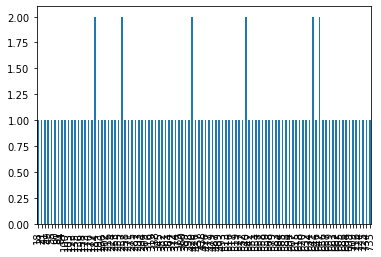

In [25]:
import matplotlib.pyplot as plt
train['click_timestamp'][train['label']==1].value_counts().sort_index()[:100].plot(kind='bar')

클릭발생시간 변수는 train 10일,valid 2일, test 2일로 구성됨을 확인했으며<br>
unique한 값이 많아 모델을 생성하는데 중요한 변수는 아님.<br>
<BR>
feature engineering IDEA) 하지만, 같은시간대는 하나로 그룹화하여 묶을 수 있을 것으로 판단 

## integer_feature_1

Text(0.5, 1.0, 'violinplot')

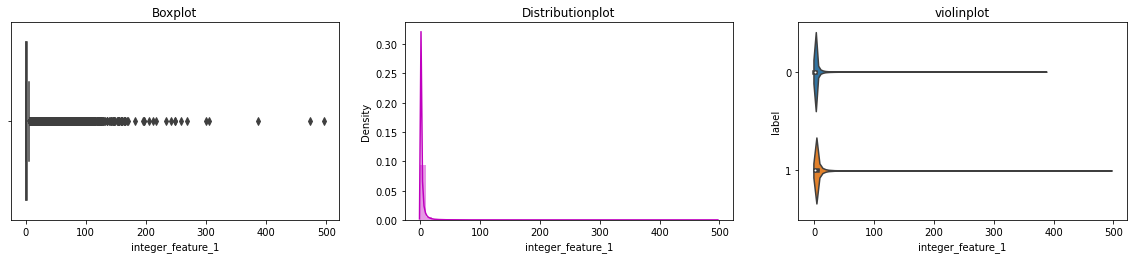

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(train['integer_feature_1']); plt.title('Boxplot')

plt.subplot(2,3,2)
sns.distplot(a=train['integer_feature_1'],color='m'); plt.title('Distributionplot')

plt.subplot(2,3,3)
sns.violinplot(x =train['integer_feature_1'], y = train.label, orient ='h'); plt.title('violinplot')

n = 100
plt.subplot(2,3,4)
sns.boxplot(train['integer_feature_1'][train['integer_feature_1']<n])

plt.subplot(2,3,5)
sns.distplot(a=train['integer_feature_1'][train['integer_feature_1']<n],color='m')

plt.subplot(2,3,6)
sns.violinplot(x =train['integer_feature_1'][train['integer_feature_1']<n], y = train.label[train['integer_feature_1']<n], orient ='h')
plt.show()

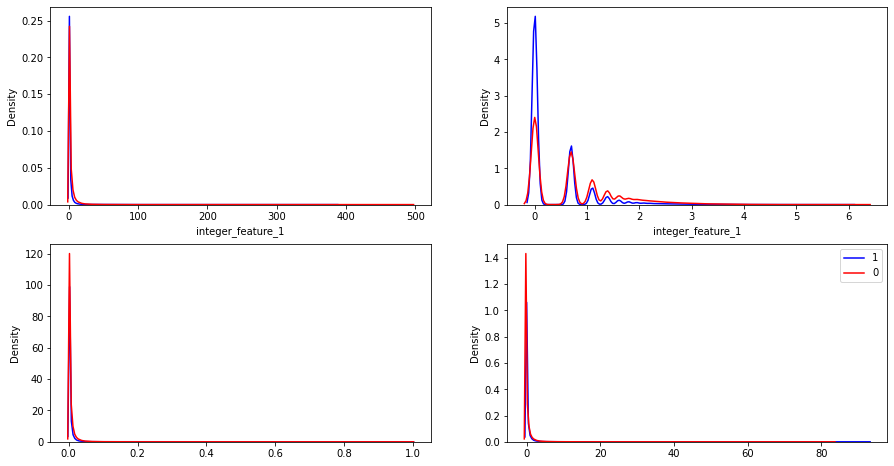

In [17]:
# 왜도 조정
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
# np.log1p 0이 존재하여 log에 1을 더한 것과 같은 기능을 하는 log1p를 사용 

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
sns.kdeplot(train['integer_feature_1'][train.label == 0], color = 'b', label = "1",ax=axs[0,0]) # 판매
sns.kdeplot(train['integer_feature_1'][train.label == 1], color = 'r', label = "0",ax=axs[0,0]) # 미판매
sns.kdeplot(np.log1p(train['integer_feature_1'][train.label == 0]), color = 'b', label = "1",ax=axs[0,1])
sns.kdeplot(np.log1p(train['integer_feature_1'][train.label == 1]), color = 'r', label = "0",ax=axs[0,1])
sns.kdeplot(minmax_scale(train['integer_feature_1'][train.label == 0]), color = 'b', label = "1",ax=axs[1,0])
sns.kdeplot(minmax_scale(train['integer_feature_1'][train.label == 1]), color = 'r', label = "0",ax=axs[1,0])
sns.kdeplot(scale(train['integer_feature_1'][train.label == 0]), color = 'b', label = "1",ax=axs[1,1])
sns.kdeplot(scale(train['integer_feature_1'][train.label == 1]), color = 'r', label = "0",ax=axs[1,1])
plt.legend()
plt.show()

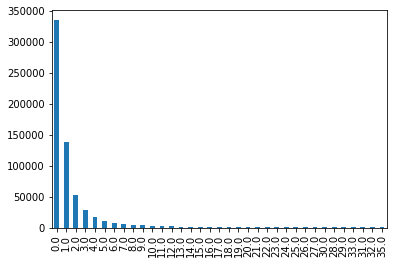

In [6]:
train['integer_feature_1'].value_counts()[:35].plot(kind='bar') # 상위10개의 분포를 확인

정수형변수1는 값이 치우쳐있으며 log transformation을활용하였더니.<br>
분포의 모양에 있어서 스펙타클한 변화는 없었지만, scale 자체를 줄일 수 있음.<br>
그리고 값중에 0 이 많음

## integer_feature_2

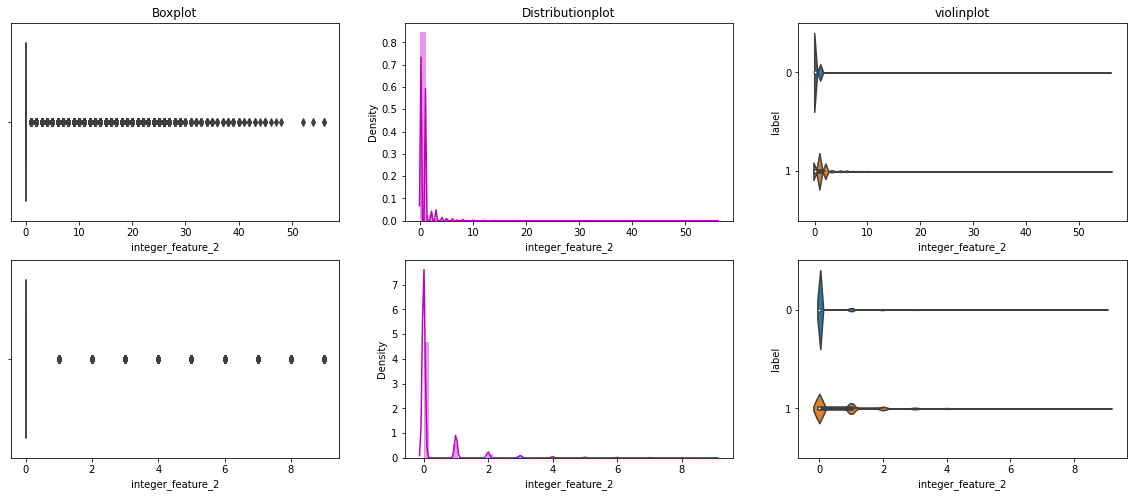

In [25]:
plt.figure(figsize=(20,8))
colcheck = 'integer_feature_2'

plt.subplot(2,3,1)
sns.boxplot(train['integer_feature_2']); plt.title('Boxplot')

plt.subplot(2,3,2)
sns.distplot(a=train['integer_feature_2'],color='m'); plt.title('Distributionplot')

plt.subplot(2,3,3)
sns.violinplot(x =train['integer_feature_2'], y = train.label, orient ='h'); plt.title('violinplot')

n = 10
plt.subplot(2,3,4)
sns.boxplot(train['integer_feature_2'][train['integer_feature_2']<n])

plt.subplot(2,3,5)
sns.distplot(a=train['integer_feature_2'][train['integer_feature_2']<n],color='m')

plt.subplot(2,3,6)
sns.violinplot(x =train['integer_feature_2'][train['integer_feature_2']<n], y = train.label[train['integer_feature_2']<n], orient ='h')
plt.show()

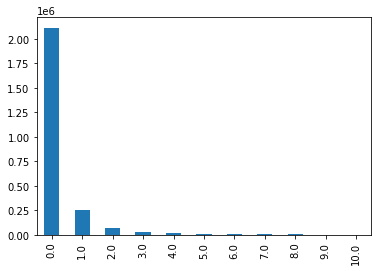

In [27]:
train['integer_feature_2'].value_counts()[:10].plot(kind='bar') # 상위10개의 분포를 확인

## integer_feature_3

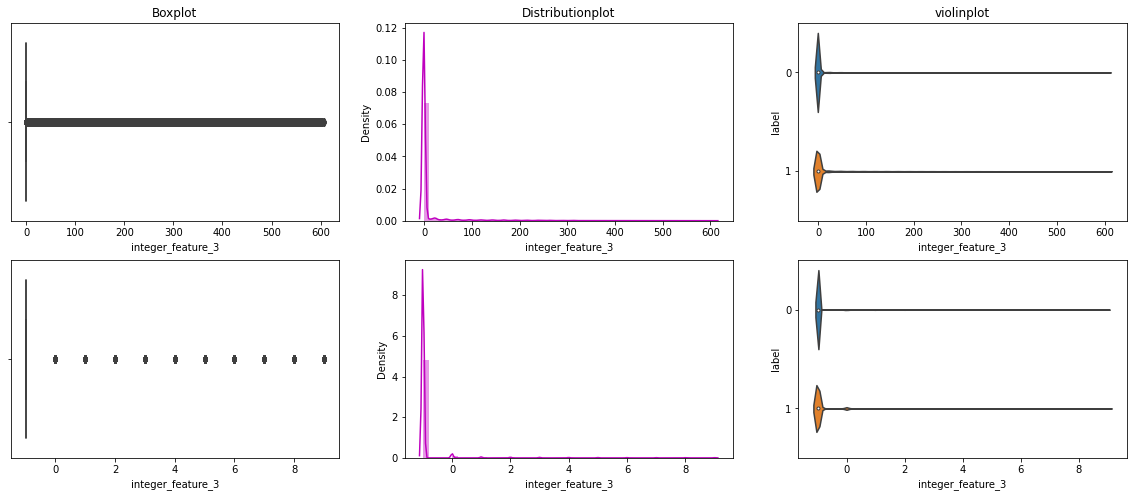

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(train['integer_feature_3']); plt.title('Boxplot')

plt.subplot(2,3,2)
sns.distplot(a=train['integer_feature_3'],color='m'); plt.title('Distributionplot')

plt.subplot(2,3,3)
sns.violinplot(x =train['integer_feature_3'], y = train.label, orient ='h'); plt.title('violinplot')

n = 10
plt.subplot(2,3,4)
sns.boxplot(train['integer_feature_3'][train['integer_feature_3']<n])

plt.subplot(2,3,5)
sns.distplot(a=train['integer_feature_3'][train['integer_feature_3']<n],color='m')

plt.subplot(2,3,6)
sns.violinplot(x =train['integer_feature_3'][train['integer_feature_3']<n], y = train.label[train['integer_feature_3']<n], orient ='h')
plt.show()

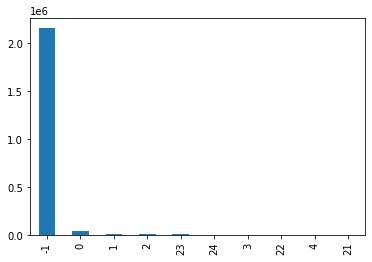

In [29]:
train['integer_feature_3'].value_counts()[:10].plot(kind='bar') # 상위10개의 분포를 확인

## integer_feature_4

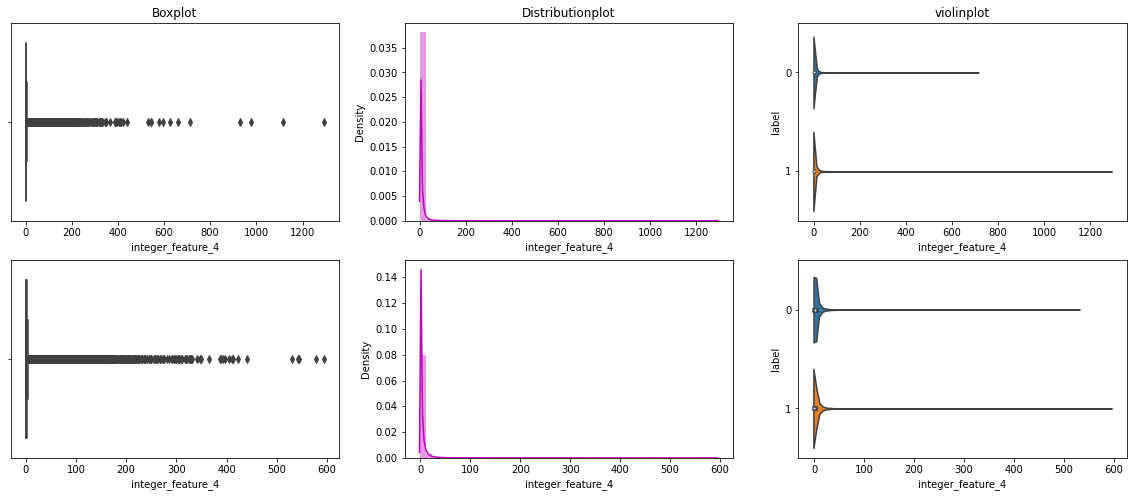

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(train['integer_feature_4']); plt.title('Boxplot')

plt.subplot(2,3,2)
sns.distplot(a=train['integer_feature_4'],color='m'); plt.title('Distributionplot')

plt.subplot(2,3,3)
sns.violinplot(x =train['integer_feature_4'], y = train.label, orient ='h'); plt.title('violinplot')

n = 600
plt.subplot(2,3,4)
sns.boxplot(train['integer_feature_4'][train['integer_feature_4']<n])

plt.subplot(2,3,5)
sns.distplot(a=train['integer_feature_4'][train['integer_feature_4']<n],color='m')

plt.subplot(2,3,6)
sns.violinplot(x =train['integer_feature_4'][train['integer_feature_4']<n], y = train.label[train['integer_feature_4']<n], orient ='h')
plt.show()

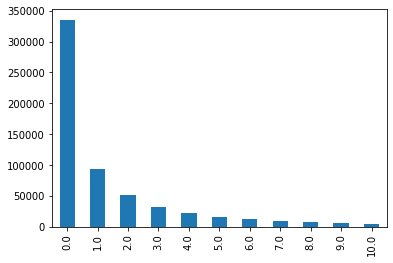

In [31]:
train['integer_feature_4'].value_counts()[:10].plot(kind='bar') # 상위10개의 분포를 확인

## integer_feature_5

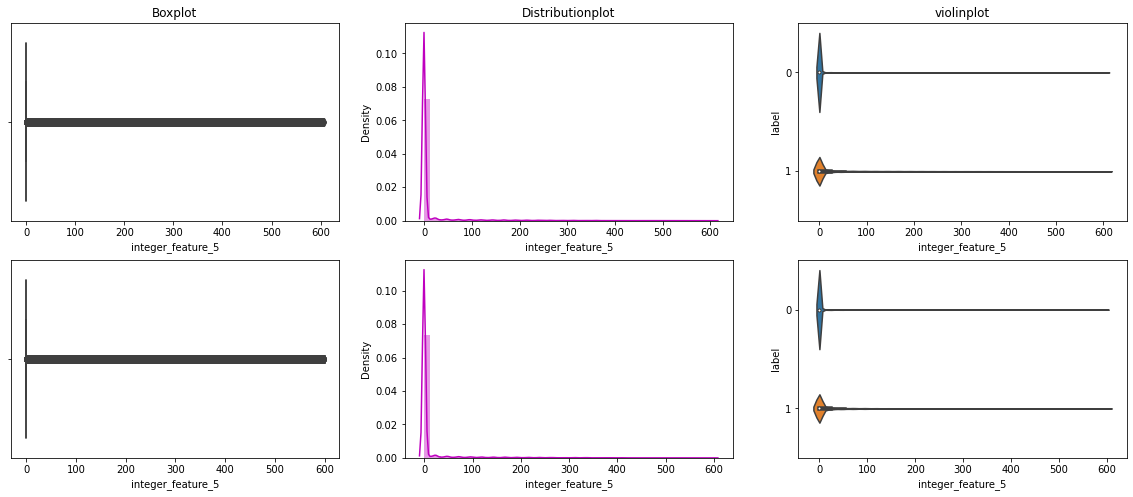

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(train['integer_feature_5']); plt.title('Boxplot')

plt.subplot(2,3,2)
sns.distplot(a=train['integer_feature_5'],color='m'); plt.title('Distributionplot')

plt.subplot(2,3,3)
sns.violinplot(x =train['integer_feature_5'], y = train.label, orient ='h'); plt.title('violinplot')

n = 600
plt.subplot(2,3,4)
sns.boxplot(train['integer_feature_5'][train['integer_feature_5']<n])

plt.subplot(2,3,5)
sns.distplot(a=train['integer_feature_5'][train['integer_feature_5']<n],color='m')

plt.subplot(2,3,6)
sns.violinplot(x =train['integer_feature_5'][train['integer_feature_5']<n], y = train.label[train['integer_feature_5']<n], orient ='h')
plt.show()

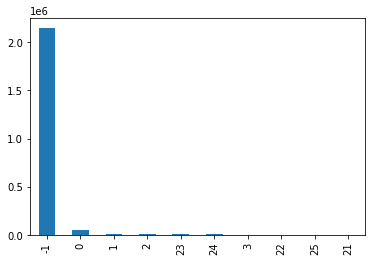

In [33]:
train['integer_feature_5'].value_counts()[:10].plot(kind='bar') # 상위10개의 분포를 확인

## integer_feature_6

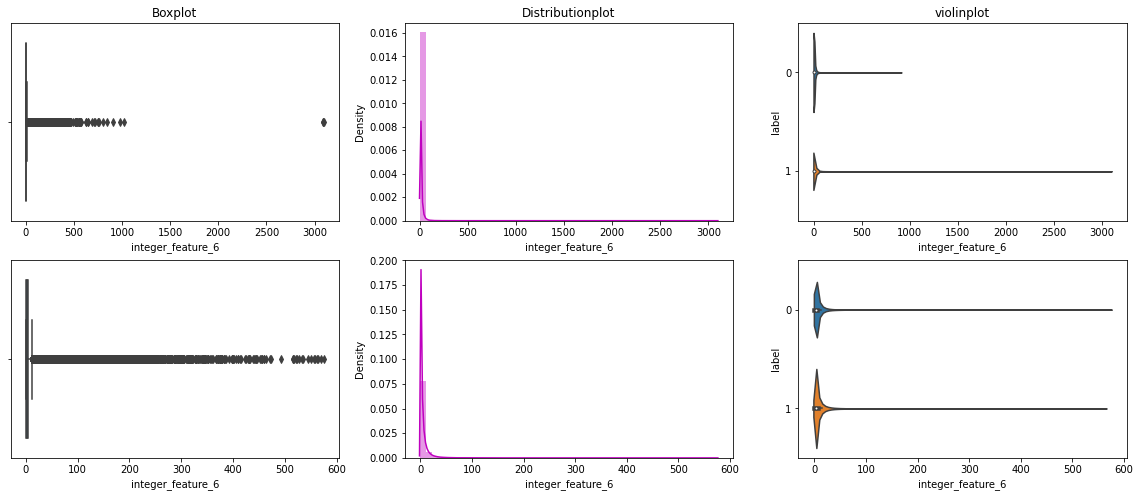

In [34]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(train['integer_feature_6']); plt.title('Boxplot')

plt.subplot(2,3,2)
sns.distplot(a=train['integer_feature_6'],color='m'); plt.title('Distributionplot')

plt.subplot(2,3,3)
sns.violinplot(x =train['integer_feature_6'], y = train.label, orient ='h'); plt.title('violinplot')

n = 600
plt.subplot(2,3,4)
sns.boxplot(train['integer_feature_6'][train['integer_feature_6']<n])

plt.subplot(2,3,5)
sns.distplot(a=train['integer_feature_6'][train['integer_feature_6']<n],color='m')

plt.subplot(2,3,6)
sns.violinplot(x =train['integer_feature_6'][train['integer_feature_6']<n], y = train.label[train['integer_feature_6']<n], orient ='h')
plt.show()

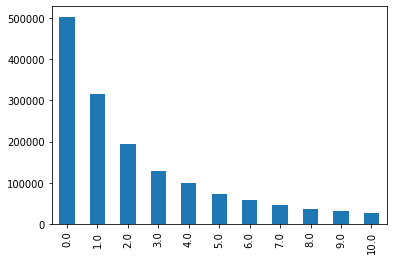

In [35]:
train['integer_feature_6'].value_counts()[:10].plot(kind='bar') # 상위10개의 분포를 확인

## integer_feature_7

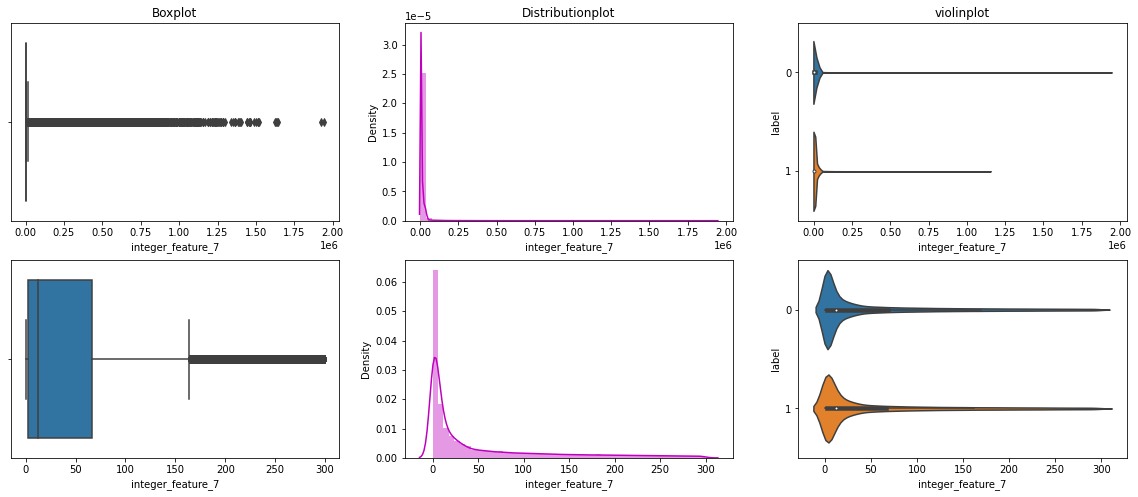

In [36]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(train['integer_feature_7']); plt.title('Boxplot')

plt.subplot(2,3,2)
sns.distplot(a=train['integer_feature_7'],color='m'); plt.title('Distributionplot')

plt.subplot(2,3,3)
sns.violinplot(x =train['integer_feature_7'], y = train.label, orient ='h'); plt.title('violinplot')

n = 300
plt.subplot(2,3,4)
sns.boxplot(train['integer_feature_7'][train['integer_feature_7']<n])

plt.subplot(2,3,5)
sns.distplot(a=train['integer_feature_7'][train['integer_feature_7']<n],color='m')

plt.subplot(2,3,6)
sns.violinplot(x =train['integer_feature_7'][train['integer_feature_7']<n], y = train.label[train['integer_feature_7']<n], orient ='h')
plt.show()

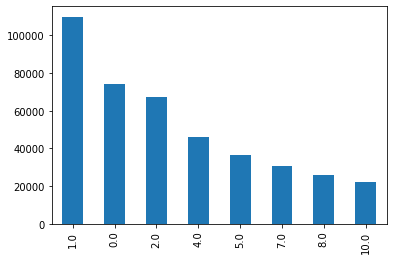

In [37]:
train['integer_feature_7'].value_counts()[:10].plot(kind='bar') # 상위10개의 분포를 확인

## integer_feature_8

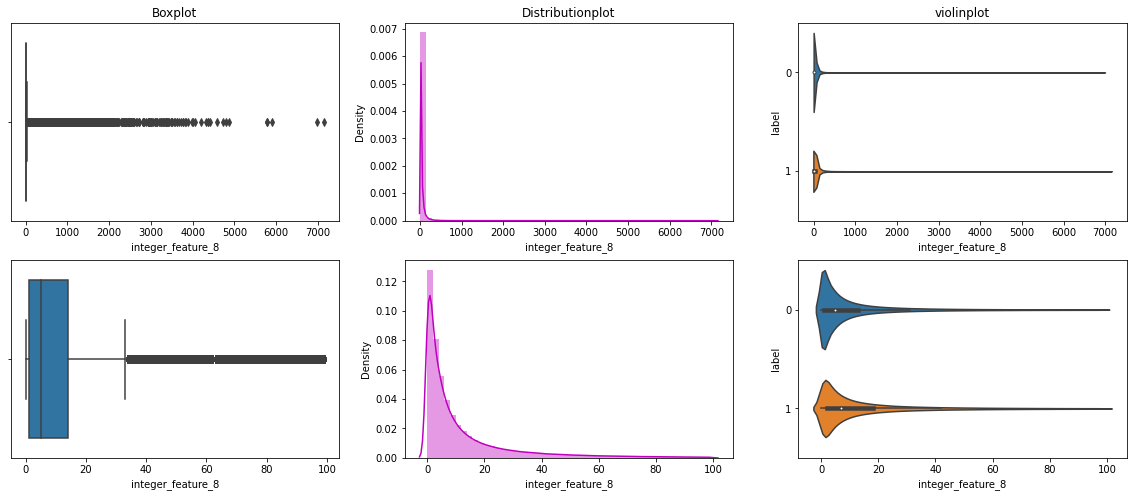

In [38]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(train['integer_feature_8']); plt.title('Boxplot')

plt.subplot(2,3,2)
sns.distplot(a=train['integer_feature_8'],color='m'); plt.title('Distributionplot')

plt.subplot(2,3,3)
sns.violinplot(x =train['integer_feature_8'], y = train.label, orient ='h'); plt.title('violinplot')

n = 100 # 구간을 줄여보기
plt.subplot(2,3,4)
sns.boxplot(train['integer_feature_8'][train['integer_feature_8']<n])

plt.subplot(2,3,5)
sns.distplot(a=train['integer_feature_8'][train['integer_feature_8']<n],color='m')

plt.subplot(2,3,6)
sns.violinplot(x =train['integer_feature_8'][train['integer_feature_8']<n], y = train.label[train['integer_feature_8']<n], orient ='h')
plt.show()

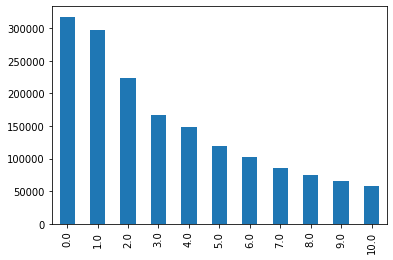

In [39]:
train['integer_feature_8'].value_counts()[:10].plot(kind='bar') # 상위10개의 분포를 확인

## 각 범주형변수들의 차집합
- train에는있는데 valid에는 없는 범주형변수들이 존재

![python image2](https://mblogthumb-phinf.pstatic.net/20160702_167/2gumin14_1467451020215HqwdV_PNG/37.PNG?type=w2)

In [43]:
print(set(train['categorical_feature_8'].unique()).difference(set(valid['categorical_feature_8'].unique()) ))

print(train['categorical_feature_8'].unique())

print(valid['categorical_feature_8'].unique())

array(['776ce399', '3486227d', 'e5ba7672', '07c540c4', 'd4bb7bd8',
       '27c07bd6', '1e88c74f', '8efede7f', '2005abd1', 'af5d780c'],
      dtype=object)

## 범주 levels 현황

In [43]:
for i in train.iloc[:,9:18].columns:
    print(i,'의 범주levels', len(train[i].unique()))
# 범주level이 너무 많은 문제점이 존재 

categorical_feature_1 의 범주levels 37774
categorical_feature_2 의 범주levels 4141
categorical_feature_3 의 범주levels 10878
categorical_feature_4 의 범주levels 8071
categorical_feature_5 의 범주levels 2853
categorical_feature_6 의 범주levels 16490
categorical_feature_7 의 범주levels 9823
categorical_feature_8 의 범주levels 10
categorical_feature_9 의 범주levels 8711


## categorical_feature_1
- 범주형변수의 시각화  
- 범주형변수가 level이 너무 많으면 각 level이 y에끼치는 영향이 약해짐

In [41]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_1'])
train_cross.T.sort_values(by=0, ascending=False)

label,0,1
categorical_feature_1,,
7f6438ab,14148,728
0680dabb,9569,415
ad6e0317,9546,1407
620438e8,9434,549
202f2432,7779,277
...,...,...
f2671ac8,0,1
ce0f064a,0,2
976a228e,0,1


### categorical_feature_2

In [ ]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_2'])
train_cross.T.sort_values(by=0, ascending=False)
print(len(train['categorical_feature_2'].unique()))

### categorical_feature_3

In [27]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_3'])
train_cross.T.sort_values(by=0, ascending=False)

label,0,1
categorical_feature_3,,
7fde5a70,20759,6308
41707ecb,20253,5290
12420a1e,18561,1219
2225c6f1,14148,728
ad3508b1,12178,1052
...,...,...
2a78ff55,0,2
cd504e87,0,2
e63ad2c1,0,1


### categorical_feature_4

In [28]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_4'])
train_cross.T.sort_values(by=0, ascending=False)

label,0,1
categorical_feature_4,,
c37c627e,33117,193
898ec876,28181,4431
eb868870,26152,11185
23c80a6e,25662,9946
68a7e258,19836,662
...,...,...
61397f0e,0,1
616bea0d,0,1
c8ce3f45,0,6


### categorical_feature_5

In [29]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_5'])
train_cross.T.sort_values(by=0, ascending=False)

label,0,1
categorical_feature_5,,
2fad1153,35671,257
51b97b8f,29907,8047
e69eaa04,27948,15361
46f42a63,27761,12980
7aab7990,22268,11317
...,...,...
5aae435a,1,0
3a189c6c,1,1
e614d3c6,1,0


### categorical_feature_6

In [31]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_6'])
train_cross.T.sort_values(by=0, ascending=False)

label,0,1
categorical_feature_6,,
198502ce,2606,0
20ea94d2,1373,4258
595fd523,1124,0
7813958c,961,1824
538c0d7f,782,0
...,...,...
56788f9f,0,1
5652e4dd,0,2
564fb6cf,0,1


### categorical_feature_7

In [30]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_7'])
train_cross.T.sort_values(by=0, ascending=False)

label,0,1
categorical_feature_7,,
5d4be191,36754,8228
1b2b16d5,30834,11912
dd50d10b,27951,6920
6ba8bf37,27097,8331
55da8610,24450,6599
...,...,...
c23848ed,0,1
1ec17097,0,1
1e905e38,0,2


### categorical_feature_8

In [13]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_8'])
train_cross.T.sort_values(by=0, ascending=False)

label,0,1
categorical_feature_8,,
e5ba7672,1125511,169238
07c540c4,236832,36638
d4bb7bd8,178075,25785
3486227d,141981,88392
27c07bd6,91736,87327
8efede7f,89449,145438
1e88c74f,52654,4614
776ce399,39991,4610
2005abd1,18058,205


### categorical_feature_9

In [26]:
# 두 질적자료의 빈도표를 생성
train_cross = pd.crosstab(train.label, train['categorical_feature_9'])
train_cross.T.sort_values(by=0, ascending=False)

label,0,1
categorical_feature_9,,
28439657,5936,5971
66780853,5381,72
5f447f1c,4418,1773
a310950a,4277,4835
4c26e465,4075,2361
...,...,...
27d21956,0,1
dc98c4be,0,3
5f38ca9e,0,1


# 4. DeepFM 모델 생성 및 검증 

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from deepctr.models import *
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

In [33]:
import pandas as pd
pd.options.display.float_format='{:.5f}'.format # 5자리까지출력

import warnings
warnings.filterwarnings(action='ignore') # 에러는 무시

train_raw = pd.read_csv('data/train.csv')
valid_raw = pd.read_csv('data/validation.csv')
test_raw = pd.read_csv('data/test.csv')

In [66]:
dense_features = train_raw.iloc[:,1:9].columns 
sparse_features = train_raw.iloc[:,9:18].columns 

train_raw[sparse_features] = train_raw[sparse_features].fillna('-1', )
train_raw[dense_features] = train_raw[dense_features].fillna(0, )
target = ['label']
for feat in sparse_features:
    lbe = LabelEncoder()
    train_raw[feat] = lbe.fit_transform(train_raw[feat])
mms = MinMaxScaler(feature_range=(0, 1))
train_raw[dense_features] = mms.fit_transform(train_raw[dense_features])


fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=train_raw[feat].nunique(),embedding_dim=4)
                       for i,feat in enumerate(sparse_features)] + [DenseFeat(feat, 1,)
                      for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)
train_model_input = {name:train_raw[name] for name in feature_names}


model = DeepFM(linear_feature_columns, dnn_feature_columns, task='binary',dnn_hidden_units=(32,))
model.compile("adam", "binary_crossentropy",
              metrics=['accuracy'], )

history = model.fit(train_model_input, train_raw[target].values, 
                    batch_size=256, epochs=10, verbose=1, validation_split=0.3,)

Epoch 1/10
6936/6936 [==============================] - 30s 4ms/step - loss: 0.3780 - accuracy: 0.8370 - val_loss: 0.3755 - val_accuracy: 0.8397
Epoch 2/10
6936/6936 [==============================] - 30s 4ms/step - loss: 0.3716 - accuracy: 0.8400 - val_loss: 0.3751 - val_accuracy: 0.8404
Epoch 3/10
6936/6936 [==============================] - 30s 4ms/step - loss: 0.3708 - accuracy: 0.8406 - val_loss: 0.3754 - val_accuracy: 0.8406
Epoch 4/10
6936/6936 [==============================] - 30s 4ms/step - loss: 0.3704 - accuracy: 0.8410 - val_loss: 0.3756 - val_accuracy: 0.8404
Epoch 5/10
6936/6936 [==============================] - 30s 4ms/step - loss: 0.3700 - accuracy: 0.8411 - val_loss: 0.3753 - val_accuracy: 0.8405
Epoch 6/10
6936/6936 [==============================] - 30s 4ms/step - loss: 0.3697 - accuracy: 0.8414 - val_loss: 0.3756 - val_accuracy: 0.8409
Epoch 7/10
6936/6936 [==============================] - 30s 4ms/step - loss: 0.3696 - accuracy: 0.8415 - val_loss: 0.3755 - val_ac

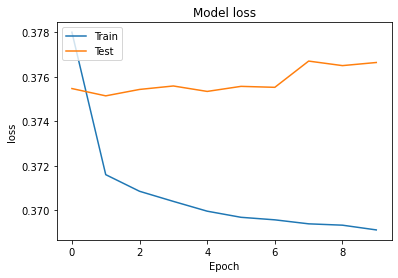

In [69]:
# loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

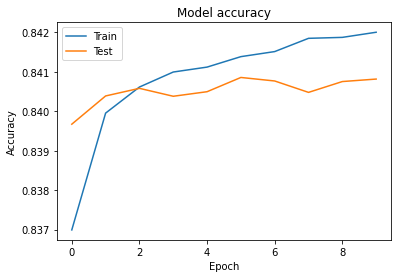

In [70]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [71]:
# valid 데이터로 검증
dense_features = valid_raw.iloc[:,1:9].columns 
sparse_features = valid_raw.iloc[:,9:18].columns 

valid_raw[sparse_features] = valid_raw[sparse_features].fillna('-1', )
valid_raw[dense_features] = valid_raw[dense_features].fillna(0, )
target = ['label']
for feat in sparse_features:
    lbe = LabelEncoder()
    valid_raw[feat] = lbe.fit_transform(valid_raw[feat])
mms = MinMaxScaler(feature_range=(0, 1))
valid_raw[dense_features] = mms.fit_transform(valid_raw[dense_features])


fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=valid_raw[feat].nunique(),embedding_dim=4)
                       for i,feat in enumerate(sparse_features)] + [DenseFeat(feat, 1,)
                      for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)
valid_model_input = {name:valid_raw[name] for name in feature_names}


pred_ans = model.predict(valid_model_input, batch_size=256)
print("valid LogLoss", round(log_loss(valid_raw[target].values, pred_ans), 4))
print("valid AUC", round(roc_auc_score(valid_raw[target].values, pred_ans), 4))

valid LogLoss 0.4968
valid AUC 0.7037


In [72]:
# test데이터 입력데이터 생성
dense_features = test_raw.iloc[:,2:10].columns  
sparse_features = test_raw.iloc[:,10:].columns

test_raw[sparse_features] = test_raw[sparse_features].fillna('-1', )
test_raw[dense_features] = test_raw[dense_features].fillna(0, )

for feat in sparse_features:
    lbe = LabelEncoder()
    test_raw[feat] = lbe.fit_transform(test_raw[feat])
mms = MinMaxScaler(feature_range=(0, 1))
test_raw[dense_features] = mms.fit_transform(test_raw[dense_features])


fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=test_raw[feat].nunique(),embedding_dim=4)
                       for i,feat in enumerate(sparse_features)] + [DenseFeat(feat, 1,)
                      for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns


feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)
test_model_input = {name:test_raw[name] for name in feature_names}

In [73]:
# 5.제출
test_pred = model.predict(test_model_input)

submission = pd.DataFrame(columns = ['id','predicted'], dtype='float')
submission['id'] = test_raw['id']
submission['predicted'] = test_pred
submission

,id,predicted
0,1,0.44949
1,2,0.17959
2,3,0.37925
3,4,0.65164
4,5,0.36221
...,...,...
498548,498549,0.14361
498549,498550,0.22605
498550,498551,0.06087
498551,498552,0.21389


# 5.LGBM 모델 생성 및 검증 +  변수중요도 분석

In [74]:
import pandas as pd
pd.options.display.float_format='{:.5f}'.format # 5자리까지출력

import warnings
warnings.filterwarnings(action='ignore') # 에러는 무시

train_raw = pd.read_csv('data/train.csv')
valid_raw = pd.read_csv('data/validation.csv')
test_raw = pd.read_csv('data/test.csv')

In [75]:
# category 데이터로 변환
cate_features = [col for c, col in enumerate(train_raw.columns) if 'cat' in col]
train_raw[cate_features] = train_raw[cate_features].astype('category')
valid_raw[cate_features] = valid_raw[cate_features].astype('category')

# category 데이터로 변환
cate_features2 = [col for c, col in enumerate(test_raw.columns) if 'cat' in col]
test_raw[cate_features2] = test_raw[cate_features2].astype('category')

In [76]:
# 데이터 추출
x_train = train_raw.drop(['click_timestamp','label'], axis =1)
y_train = train_raw['label']
x_valid = valid_raw.drop(['click_timestamp','label'], axis =1)
y_valid = valid_raw['label']

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	training's auc: 0.824452	training's binary_logloss: 0.500066	valid_1's auc: 0.811177	valid_1's binary_logloss: 0.499091
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.834841	training's binary_logloss: 0.478647	valid_1's auc: 0.821754	valid_1's binary_logloss: 0.478771
[3]	training's auc: 0.837729	training's binary_logloss: 0.461889	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.462883
[4]	training's auc: 0.838638	training's binary_logloss: 0.448345	valid_1's auc: 0.825309	valid_1's binary_logloss: 0.450038
[5]	training's auc: 0.839543	training's binary_logloss: 0.4375	valid_1's auc: 0.826283	valid_1's binary_logloss: 0.439818
[6]	training's auc: 0.841826	training's binary_logloss: 0.428472	valid_1's auc: 0.828057	valid_1's binary_logloss: 0.431355
[7]	training's

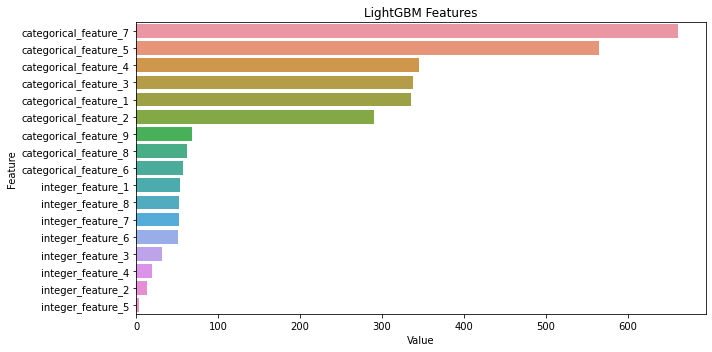

In [80]:
from lightgbm import LGBMClassifier


gbm = LGBMClassifier(n_estimator = 2000, objective='binary' ,max_depth  =10)
gbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc', 
        eval_set=[(x_train, y_train), (x_valid, y_valid)],
        feature_name =['integer_feature_1', 'integer_feature_2', 'integer_feature_3',
       'integer_feature_4', 'integer_feature_5', 'integer_feature_6',
       'integer_feature_7', 'integer_feature_8', 'categorical_feature_1',
       'categorical_feature_2', 'categorical_feature_3',
       'categorical_feature_4', 'categorical_feature_5',
       'categorical_feature_6', 'categorical_feature_7',
       'categorical_feature_8', 'categorical_feature_9'], 
        categorical_feature =cate_features)

import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,x_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

categorical_feature7, 5, 4 의 순으로 변수중요도를 확인

Text(0.5, 1.0, 'AUC')

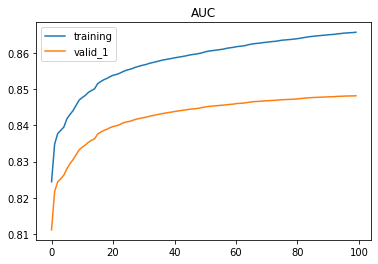

In [81]:
plt.plot(gbm.evals_result_['training']['auc'], label = 'training')
plt.plot(gbm.evals_result_['valid_1']['auc'], label = 'valid_1')
plt.legend()
plt.title('AUC')

In [87]:
gbm.evals_result_['valid_1']['auc'][-1]

0.848164240328708

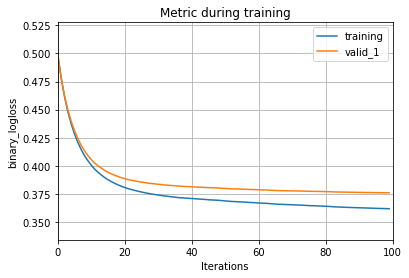

In [82]:
import lightgbm as lgb
lgb.plot_metric(gbm)

In [93]:
print("valid Loss :", round(gbm.evals_result_['valid_1']['binary_logloss'][-1], 4))
print("valid  Accuracy Score :", round(gbm.evals_result_['valid_1']['auc'][-1], 4))

valid Loss 0.3759
valid  Accuracy Score :,  0.8482


# 5.제출

In [94]:
y_pred = gbm.predict_proba(test_raw.iloc[:,2:])[:,1]

submission = pd.DataFrame(columns = ['id','predicted'], dtype='float')
submission['id'] = test_raw['id']
submission['predicted'] = y_pred
submission

,id,predicted
0,1,0.35414
1,2,0.03357
2,3,0.26336
3,4,0.66577
4,5,0.21863
...,...,...
498548,498549,0.15842
498549,498550,0.29359
498550,498551,0.00648
498551,498552,0.12348


In [96]:
submission.to_csv('submission_dyyoon.csv',index=False)

# 6.결론

LightGBM모델, DeepFM모델을 모두 활용해 보았으나 accuracy, logloss에서 LightGBM모델이 좋은 결과를 도출하여 <BR> 
최종적으로 LightGBM모델을 활용<BR>

LightGBM모델을 통해 변수중요도를 확인하였으며<BR>
최종 TEST데이터의 출력값을 추출<BR>